# Business Problem:

In this third practical application assignment, my goal is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) I encountered in this section of the program. I will use a dataset related to the marketing of bank products over the telephone.

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Citation for data: https://archive.ics.uci.edu/dataset/222/bank+marketing
Moro, S., Rita, P., & Cortez, P. (2014). Bank Marketing [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

# Preprocessing

In [8]:
# Combine features and target for initial exploration
df = pd.concat([X, y], axis=1)

# Basic exploration
print("Dataset shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nFeature info:\n")
print(df.info())

# Separate numerical and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

print("\nNumerical features:", numeric_features.tolist())
print("\nCategorical features:", categorical_features.tolist())

# Basic statistics for numeric columns
print("\nNumeric features statistics:\n")
print(df[numeric_features].describe())

# Value counts for categorical columns
for cat_col in categorical_features:
    print(f"\nUnique values in {cat_col}:")
    print(df[cat_col].value_counts())

Dataset shape: (45211, 17)

Missing values:
 age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

Feature info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_

In [9]:
# Create preprocessing pipelines for numerical and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', LabelEncoder())
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Interpretation

The data contains 45211 entries.
They polled with 1 standard deviation on age between 30-50 and from 18 to 95 in total.  This seems like a good spread and not age biased versus the task.
Jobs are quite varied and show good representation.
None of the other values seem to show any bias on selection of samples.  It is worth otuing that nmost calls were cellular and not telephone.  That is not unusual, but could be an imbalance to look for.

## KNN

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

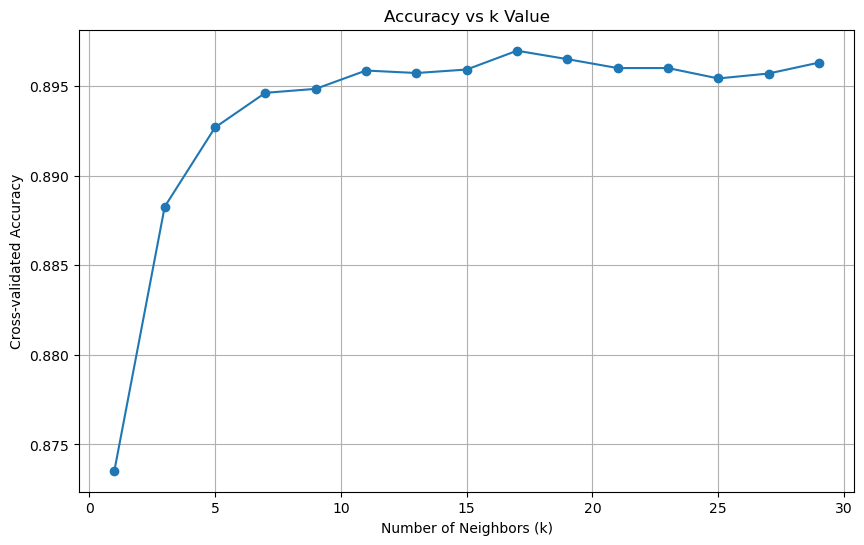


Optimal k value: 17
Best cross-validation accuracy: 0.8970

Classification Report:
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7952
         yes       0.65      0.27      0.38      1091

    accuracy                           0.89      9043
   macro avg       0.78      0.63      0.66      9043
weighted avg       0.88      0.89      0.87      9043



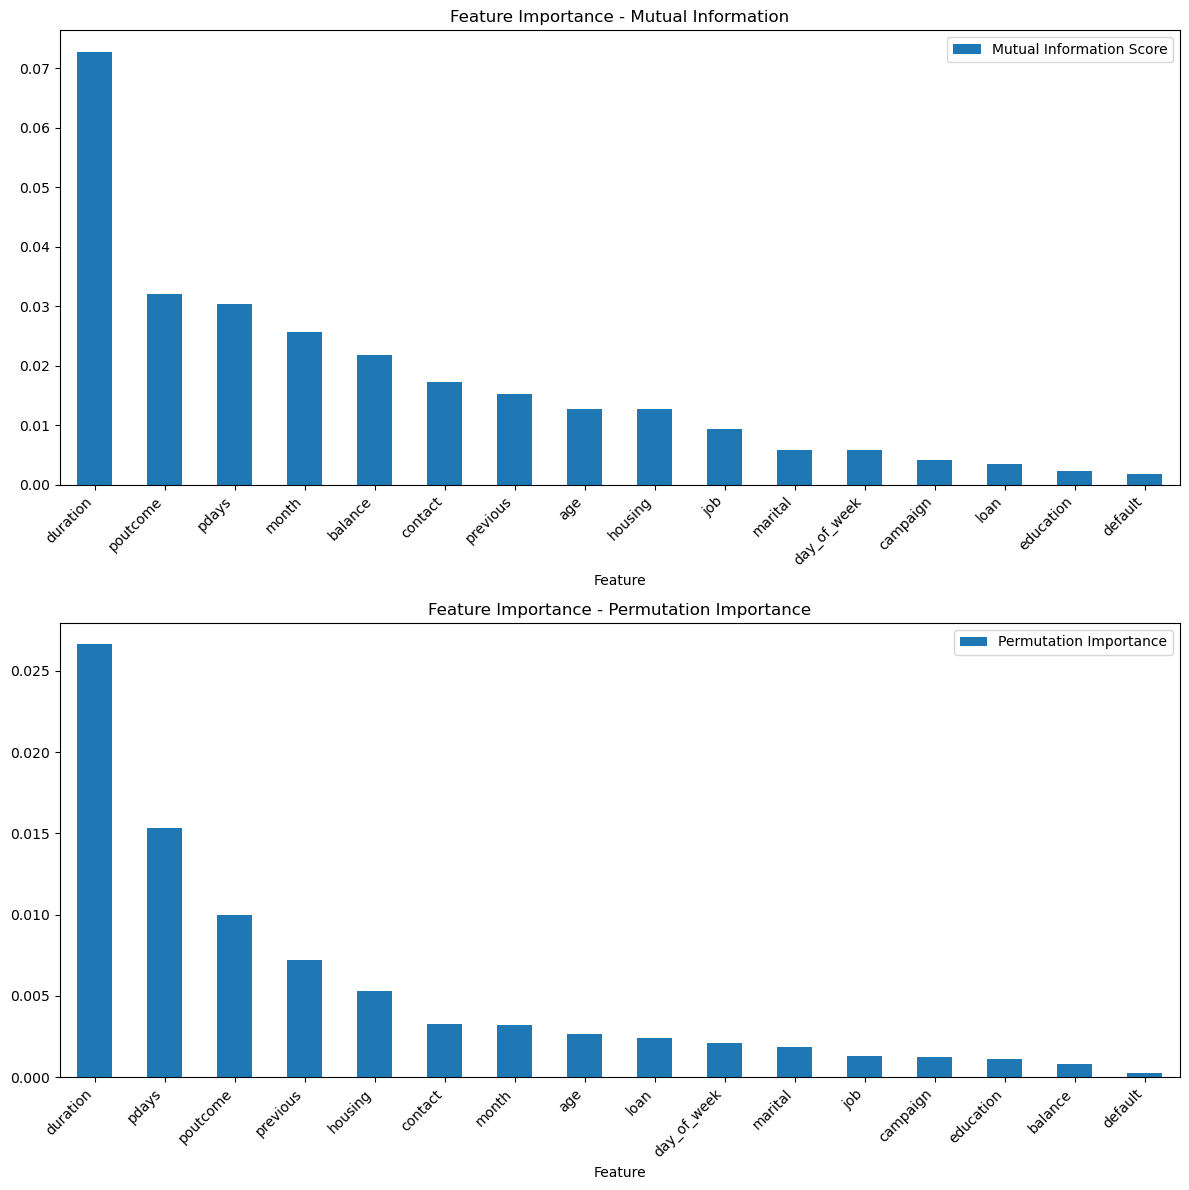


Top 5 Most Important Features (Mutual Information):
     Feature  Mutual Information Score
11  duration                  0.072765
15  poutcome                  0.032145
13     pdays                  0.030426
10     month                  0.025629
5    balance                  0.021792

Top 5 Most Important Features (Permutation Importance):
     Feature  Permutation Importance
11  duration                0.026613
13     pdays                0.015335
15  poutcome                0.010004
14  previous                0.007206
6    housing                0.005317


In [12]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

def preprocess_data(X, y):
    """Preprocess the data with encoding and scaling."""
    # Create copies to avoid modifying original data
    X_processed = X.copy()
    
    # Convert y to 1d array if it's not already
    y_processed = np.ravel(y)
    
    # Initialize LabelEncoder for categorical columns
    le_dict = {}
    categorical_columns = X.select_dtypes(include=['object']).columns
    
    # Encode categorical variables
    for column in categorical_columns:
        le_dict[column] = LabelEncoder()
        X_processed[column] = le_dict[column].fit_transform(X_processed[column])
    
    # Scale all features
    scaler = StandardScaler()
    X_processed = pd.DataFrame(scaler.fit_transform(X_processed), columns=X_processed.columns)
    
    return X_processed, y_processed, le_dict

def find_optimal_k(X_train, X_test, y_train, y_test, k_range=range(1, 31, 2)):
    """Find optimal k value for KNN."""
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        k_scores.append(scores.mean())
    
    optimal_k = k_range[np.argmax(k_scores)]
    
    # Plot k values vs accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, k_scores, marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Cross-validated Accuracy')
    plt.title('Accuracy vs k Value')
    plt.grid(True)
    plt.show()
    
    return optimal_k, k_scores

def analyze_feature_importance(X, y, knn_model):
    """Analyze feature importance using multiple methods."""
    # Method 1: Mutual Information
    mi_scores = mutual_info_classif(X, y)
    mi_importance = pd.DataFrame({
        'Feature': X.columns, 
        'Mutual Information Score': mi_scores
    }).sort_values('Mutual Information Score', ascending=False)
    
    # Method 2: Permutation Importance
    perm_importance = permutation_importance(knn_model, X, y, n_repeats=10, random_state=42)
    perm_imp_df = pd.DataFrame({
        'Feature': X.columns, 
        'Permutation Importance': perm_importance.importances_mean
    }).sort_values('Permutation Importance', ascending=False)
    
    return mi_importance, perm_imp_df

def plot_feature_importance(mi_importance, perm_imp_df):
    """Plot feature importance results."""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Plot Mutual Information
    mi_importance.plot(x='Feature', y='Mutual Information Score', kind='bar', ax=ax1)
    ax1.set_title('Feature Importance - Mutual Information')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
    
    # Plot Permutation Importance
    perm_imp_df.plot(x='Feature', y='Permutation Importance', kind='bar', ax=ax2)
    ax2.set_title('Feature Importance - Permutation Importance')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

def run_knn_analysis(X, y):
    """Run complete KNN analysis pipeline."""
    # Preprocess data
    X_processed, y_processed, le_dict = preprocess_data(X, y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed, test_size=0.2, random_state=42
    )
    
    # Find optimal k
    optimal_k, k_scores = find_optimal_k(X_train, X_test, y_train, y_test)
    print(f"\nOptimal k value: {optimal_k}")
    print(f"Best cross-validation accuracy: {max(k_scores):.4f}")
    
    # Train KNN with optimal k
    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    knn.fit(X_train, y_train)
    
    # Evaluate model
    y_pred = knn.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Analyze and visualize feature importance
    mi_importance, perm_imp_df = analyze_feature_importance(X_processed, y_processed, knn)
    plot_feature_importance(mi_importance, perm_imp_df)
    
    print("\nTop 5 Most Important Features (Mutual Information):")
    print(mi_importance.head())
    
    print("\nTop 5 Most Important Features (Permutation Importance):")
    print(perm_imp_df.head())
    
    return knn, mi_importance, perm_imp_df

# Run the analysis
knn_model, mutual_info_importance, permutation_importance = run_knn_analysis(X, y)

# KNN Results:

Duration can be ignored as longer calls would naturally correlate with successful interactions and customer interest and not vice-versa.

Focus on past success.  Previous positive results are the best indicator of potential success.  Given that you can not function by only calling past successes, the indicator that showed the best promise of success was based on month of the year.  Timing is obviously important.  Average yearly balance, contact format, age, if they have a housing loan and job were the next most influencial factors, in order of importance.  The other features were of significantly less importance.

 4.7%

# Logistic Regression


Cross-validation scores: [0.88941111 0.88927288 0.89106995 0.89285221 0.89561731]
Average CV accuracy: 0.8916 (+/- 0.0047)

Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.98      0.94      7952
         yes       0.60      0.22      0.32      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043


ROC Curve:


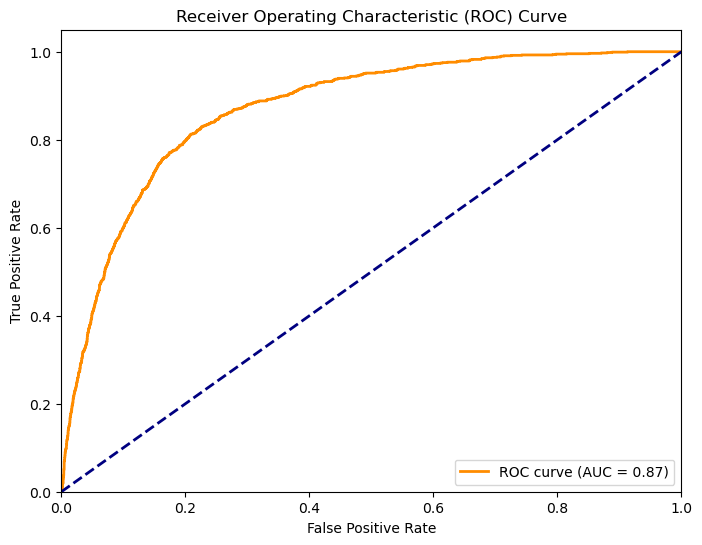


Feature Importance Analysis:


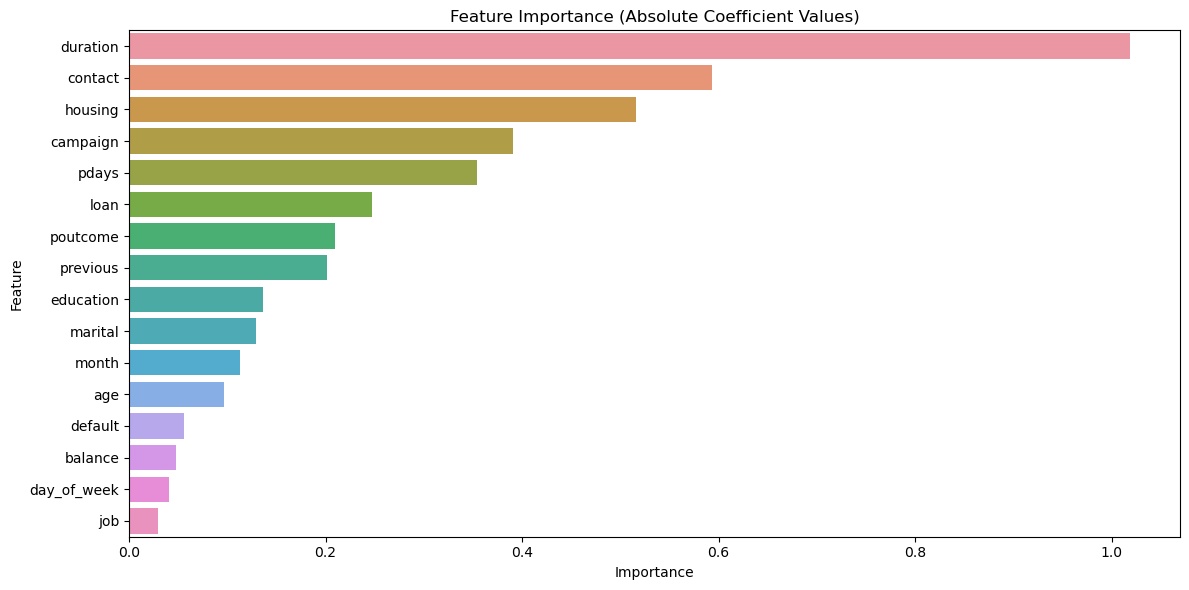


Top 10 Most Important Features:
      Feature  Importance
11   duration    1.018520
8     contact    0.592988
6     housing    0.516282
12   campaign    0.390635
13      pdays    0.354251
7        loan    0.247212
15   poutcome    0.209402
14   previous    0.201471
3   education    0.135913
2     marital    0.129232

Odds Ratios (Top 10 positive and negative):

Top 10 Positive Impact:
      Feature  Coefficient  Odds Ratio
11   duration     1.018520    2.769094
13      pdays     0.354251    1.425113
15   poutcome     0.209402    1.232940
14   previous     0.201471    1.223201
3   education     0.135913    1.145582
2     marital     0.129232    1.137954
10      month     0.112759    1.119362
0         age     0.096863    1.101710
5     balance     0.048260    1.049443
1         job     0.028980    1.029404

Top 10 Negative Impact:
        Feature  Coefficient  Odds Ratio
10        month     0.112759    1.119362
0           age     0.096863    1.101710
5       balance     0.048260    1.

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(X, y):
    """Preprocess the data with encoding and scaling."""
    # Create copies to avoid modifying original data
    X_processed = X.copy()
    
    # Encode target variable
    le_target = LabelEncoder()
    y_processed = le_target.fit_transform(np.ravel(y))
    
    # Initialize LabelEncoder for categorical columns
    le_dict = {}
    categorical_columns = X.select_dtypes(include=['object']).columns
    
    # Encode categorical variables
    for column in categorical_columns:
        le_dict[column] = LabelEncoder()
        X_processed[column] = le_dict[column].fit_transform(X_processed[column])
    
    # Scale all features
    scaler = StandardScaler()
    X_processed = pd.DataFrame(scaler.fit_transform(X_processed), columns=X_processed.columns)
    
    return X_processed, y_processed, le_dict, le_target

def plot_feature_importance(model, feature_names):
    """Plot feature importance based on logistic regression coefficients."""
    # Get feature importance from model coefficients
    importance = np.abs(model.coef_[0])
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance (Absolute Coefficient Values)')
    plt.tight_layout()
    plt.show()
    
    return feature_importance

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Plot confusion matrix using seaborn."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_roc_curve(y_true, y_prob):
    """Plot ROC curve."""
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc

def run_logistic_regression_analysis(X, y):
    """Run complete Logistic Regression analysis pipeline."""
    # Preprocess data
    X_processed, y_processed, le_dict, le_target = preprocess_data(X, y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed, test_size=0.2, random_state=42
    )
    
    # Create and train model
    model = LogisticRegression(max_iter=1000, random_state=42)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("\nCross-validation scores:", cv_scores)
    print(f"Average CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Train final model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Get original class names
    class_names = le_target.classes_
    
    # Print model performance metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))

    
    # Plot ROC curve
    print("\nROC Curve:")
    roc_auc = plot_roc_curve(y_test, y_prob)
    
    # Analyze feature importance
    print("\nFeature Importance Analysis:")
    feature_importance = plot_feature_importance(model, X_processed.columns)
    
    # Print top 10 most important features
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
    
    # Calculate and print odds ratios
    odds_ratios = pd.DataFrame({
        'Feature': X_processed.columns,
        'Coefficient': model.coef_[0],
        'Odds Ratio': np.exp(model.coef_[0])
    }).sort_values('Odds Ratio', ascending=False)
    
    print("\nOdds Ratios (Top 10 positive and negative):")
    print("\nTop 10 Positive Impact:")
    print(odds_ratios.head(10))
    print("\nTop 10 Negative Impact:")
    print(odds_ratios.tail(10))
    
    return model, feature_importance, odds_ratios, roc_auc

# Run the analysis
model, feature_importance, odds_ratios, roc_auc = run_logistic_regression_analysis(X, y)

# Logistic Regression Results:

Using the ROC curve could help immensely in making operational decisions.  There is a nice 80/20 split on precision available and targeting your marketing campaign clearly works.  The ROC curve can be used to assess what level of confidence to target based on operational costs and profit per call.

Discarding duration again, Logistic Regression did come up with some different results on feature importance.  While previous results were important (now including number of campaign contacts), contact method, housing loan, and other personal loans were more importan

Month of contact and age were strong negative factors, and while not the most important factors, clearly can be very beneficial in targetting the campaigns.t.

# Decision Trees

Finding optimal tree depth...


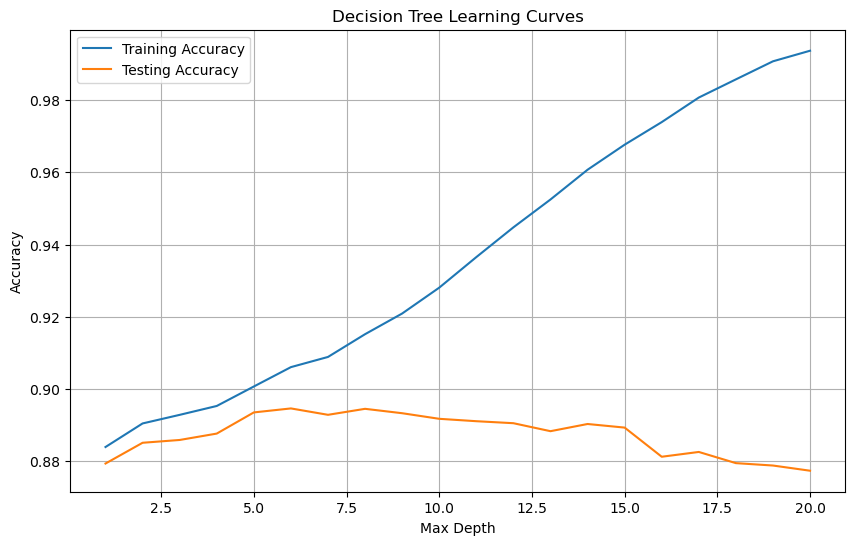


Optimal max_depth: 6
Best test accuracy: 0.8946

Training decision tree with optimal depth...

Cross-validation scores: [0.89659939 0.89881117 0.90240531 0.90045624 0.90183879]
Average CV accuracy: 0.9000 (+/- 0.0042)

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      7952
         yes       0.60      0.38      0.47      1091

    accuracy                           0.89      9043
   macro avg       0.76      0.67      0.70      9043
weighted avg       0.88      0.89      0.88      9043


Feature Importance Analysis:


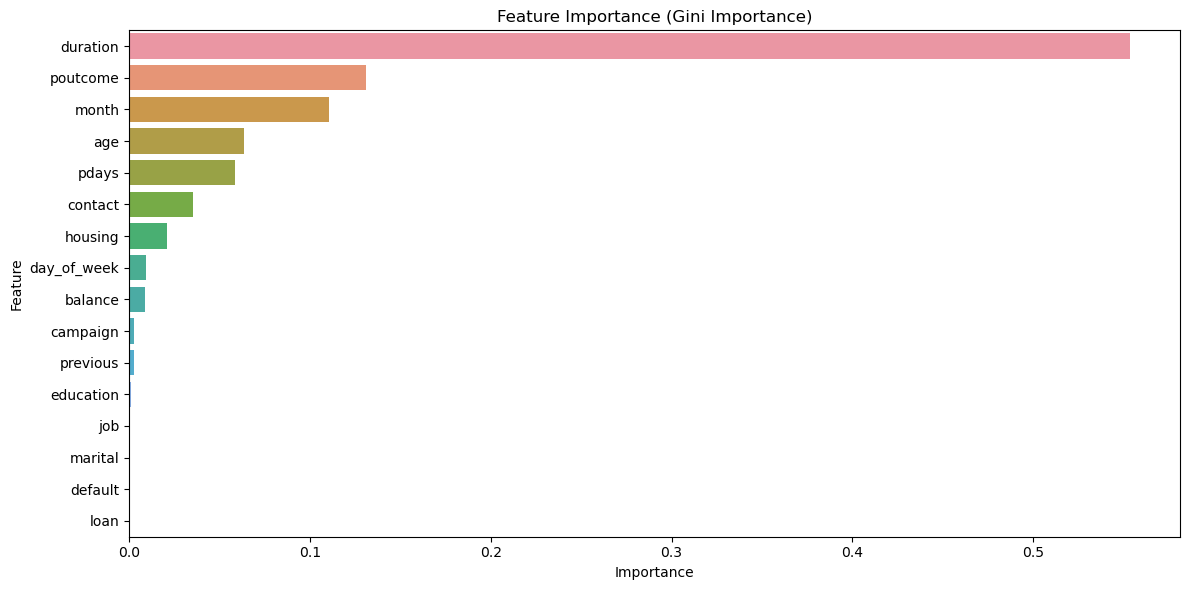


Top 10 Most Important Features:
        Feature  Importance
11     duration    0.553440
15     poutcome    0.130825
10        month    0.110714
0           age    0.063582
13        pdays    0.058518
8       contact    0.035553
6       housing    0.021262
9   day_of_week    0.009661
5       balance    0.008718
12     campaign    0.002969

Tree Statistics:
Number of nodes: 121
Maximum depth: 6
Number of leaves: 61


In [18]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(X, y):
    """Preprocess the data with encoding."""
    # Create copies to avoid modifying original data
    X_processed = X.copy()
    
    # Encode target variable
    le_target = LabelEncoder()
    y_processed = le_target.fit_transform(np.ravel(y))
    
    # Initialize LabelEncoder for categorical columns
    le_dict = {}
    categorical_columns = X.select_dtypes(include=['object']).columns
    
    # Encode categorical variables
    for column in categorical_columns:
        le_dict[column] = LabelEncoder()
        X_processed[column] = le_dict[column].fit_transform(X_processed[column])
    
    return X_processed, y_processed, le_dict, le_target

def plot_feature_importance(model, feature_names):
    """Plot feature importance from decision tree."""
    importance = model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importance (Gini Importance)')
    plt.tight_layout()
    plt.show()
    
    return feature_importance

def plot_confusion_matrix(y_true, y_pred, class_names):
    """Plot confusion matrix using seaborn."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_decision_tree(model, feature_names, class_names, max_depth=3):
    """Plot decision tree structure."""
    plt.figure(figsize=(20, 10))
    plot_tree(model, feature_names=feature_names, 
              class_names=class_names, filled=True, 
              rounded=True, max_depth=max_depth)
    plt.title(f'Decision Tree Structure (Max Depth = {max_depth})')
    plt.tight_layout()
    plt.show()

def run_decision_tree_analysis(X, y, max_depth=5):
    """Run complete Decision Tree analysis pipeline."""
    # Preprocess data
    X_processed, y_processed, le_dict, le_target = preprocess_data(X, y)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed, test_size=0.2, random_state=42
    )
    
    # Create and train model
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print("\nCross-validation scores:", cv_scores)
    print(f"Average CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Train final model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get original class names
    class_names = le_target.classes_
    
    # Print model performance metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names))
    
    # Analyze and plot feature importance
    print("\nFeature Importance Analysis:")
    feature_importance = plot_feature_importance(model, X_processed.columns)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

    
    # Additional analysis: Decision paths
    n_nodes = model.tree_.node_count
    children_left = model.tree_.children_left
    children_right = model.tree_.children_right
    feature = model.tree_.feature
    threshold = model.tree_.threshold
    
    print("\nTree Statistics:")
    print(f"Number of nodes: {n_nodes}")
    print(f"Maximum depth: {model.get_depth()}")
    print(f"Number of leaves: {model.get_n_leaves()}")
    
    return model, feature_importance

# Function to find optimal depth
def find_optimal_depth(X, y, max_depth_range=range(1, 21)):
    """Find optimal max_depth parameter."""
    X_processed, y_processed, _, _ = preprocess_data(X, y)
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed, test_size=0.2, random_state=42
    )
    
    train_scores = []
    test_scores = []
    
    for depth in max_depth_range:
        model = DecisionTreeClassifier(max_depth=depth, random_state=42)
        model.fit(X_train, y_train)
        
        train_scores.append(model.score(X_train, y_train))
        test_scores.append(model.score(X_test, y_test))
    
    # Plot learning curves
    plt.figure(figsize=(10, 6))
    plt.plot(max_depth_range, train_scores, label='Training Accuracy')
    plt.plot(max_depth_range, test_scores, label='Testing Accuracy')
    plt.xlabel('Max Depth')
    plt.ylabel('Accuracy')
    plt.title('Decision Tree Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    optimal_depth = max_depth_range[np.argmax(test_scores)]
    print(f"\nOptimal max_depth: {optimal_depth}")
    print(f"Best test accuracy: {max(test_scores):.4f}")
    
    return optimal_depth

# Find optimal depth first
print("Finding optimal tree depth...")
optimal_depth = find_optimal_depth(X, y)

# Run the analysis with optimal depth
print("\nTraining decision tree with optimal depth...")
model, feature_importance = run_decision_tree_analysis(X, y, max_depth=optimal_depth)

# Decision Tree Results

With previous outcomes still a major indicator, Decision Tree results also point to month of year and age as the most important factors.  This supports the findings from logistic regression above.

# Support Vector Machines

Running SVM analysis with feature selection...
Preprocessing data and selecting features...
Preprocessing completed in 0.22 seconds

Selected Features:
1. duration
2. poutcome
3. pdays
4. housing
5. contact
6. balance
7. month
8. marital
9. job
10. day_of_week

Feature Importance Plot:


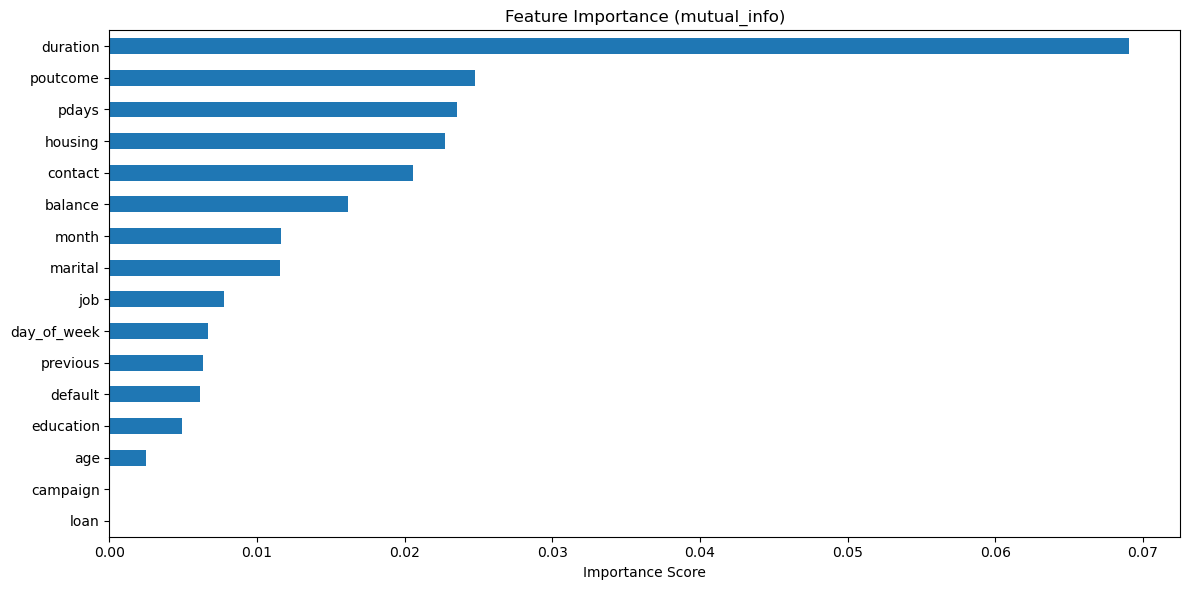


Running balanced analysis...
Training completed in 6.90 seconds

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       897
           1       0.59      0.17      0.26       103

    accuracy                           0.90      1000
   macro avg       0.75      0.58      0.60      1000
weighted avg       0.88      0.90      0.88      1000



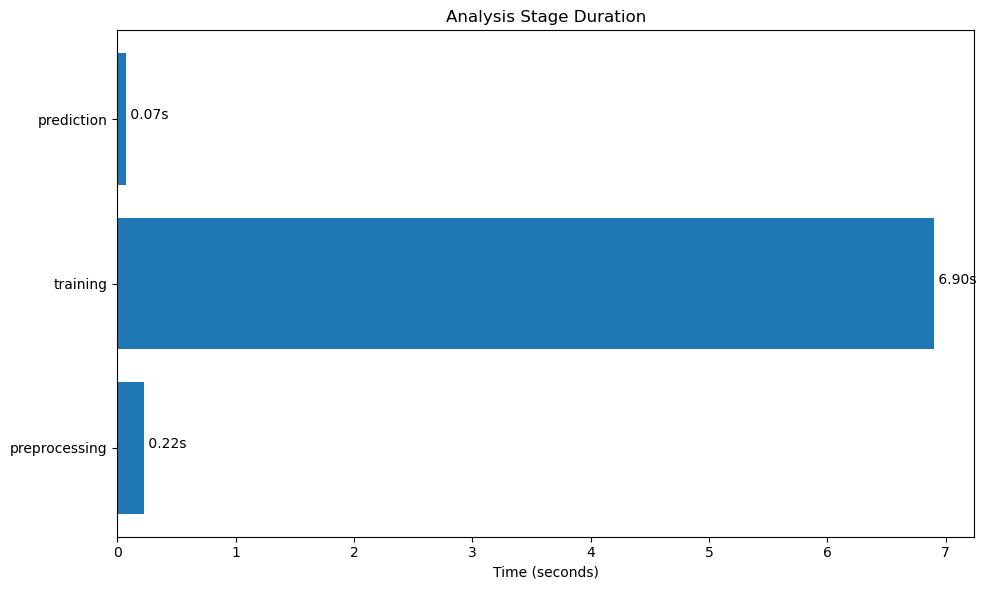


Total execution time: 7.19 seconds


In [20]:
import pandas as pd
import numpy as np
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel, RFE, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy.stats import uniform, loguniform

def select_features(X_train, X_test, y_train, method='mutual_info', n_features=10):
    """
    Select features using different methods.
    
    Methods:
    - 'mutual_info': Mutual Information
    - 'l1': L1-based feature selection
    - 'rfe': Recursive Feature Elimination
    - 'rf': Random Forest importance
    """
    feature_names = X_train.columns
    
    if method == 'mutual_info':
        # Mutual Information
        mi_scores = mutual_info_classif(X_train, y_train)
        importance = pd.Series(mi_scores, index=feature_names)
        selected_features = importance.nlargest(n_features).index
        
    elif method == 'l1':
        # L1-based feature selection
        selector = SelectFromModel(LinearSVC(penalty='l1', dual=False, random_state=42),
                                 max_features=n_features)
        selector.fit(X_train, y_train)
        selected_features = feature_names[selector.get_support()]
        importance = pd.Series(abs(selector.estimator_.coef_[0]), index=feature_names)
        
    elif method == 'rfe':
        # Recursive Feature Elimination
        estimator = LinearSVC(random_state=42)
        selector = RFE(estimator=estimator, n_features_to_select=n_features)
        selector.fit(X_train, y_train)
        selected_features = feature_names[selector.support_]
        importance = pd.Series(selector.ranking_, index=feature_names)
        importance = 1 / importance  # Convert rankings to importance scores
        
    else:  # 'rf'
        # Random Forest importance
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_train, y_train)
        importance = pd.Series(rf.feature_importances_, index=feature_names)
        selected_features = importance.nlargest(n_features).index
    
    return (X_train[selected_features], X_test[selected_features], 
            selected_features, importance)

def plot_feature_importance(importance, title="Feature Importance"):
    """Plot feature importance scores."""
    plt.figure(figsize=(12, 6))
    importance.sort_values().plot(kind='barh')
    plt.title(title)
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

def preprocess_and_select_features(X, y, sample_size=None, 
                                 feature_selection_method='mutual_info',
                                 n_features=10):
    """Preprocess data and perform feature selection."""
    # Optional downsampling
    if sample_size and sample_size < len(X):
        idx = np.random.choice(len(X), sample_size, replace=False)
        X = X.iloc[idx]
        y = y.iloc[idx]
    
    # Preprocessing
    X_processed = X.copy()
    
    # Encode target variable
    le_target = LabelEncoder()
    y_processed = le_target.fit_transform(np.ravel(y))
    
    # Encode categorical variables and scale features
    categorical_columns = X.select_dtypes(include=['object']).columns
    numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
    
    for column in categorical_columns:
        le = LabelEncoder()
        X_processed[column] = le.fit_transform(X_processed[column])
    
    scaler = StandardScaler()
    X_processed[numeric_columns] = scaler.fit_transform(X_processed[numeric_columns])
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y_processed, test_size=0.2, random_state=42
    )
    
    # Feature selection
    X_train_selected, X_test_selected, selected_features, importance = select_features(
        X_train, X_test, y_train, method=feature_selection_method, 
        n_features=n_features
    )
    
    return (X_train_selected, X_test_selected, y_train, y_test, 
            selected_features, importance, le_target)

def fast_svm_analysis_with_features(X, y, mode='quick', sample_size=None,
                                  feature_selection_method='mutual_info',
                                  n_features=10):
    """Run SVM analysis with feature selection and importance analysis."""
    timing_results = {}
    
    # Start timing
    start_time = time.time()
    
    # Preprocess and select features
    print("Preprocessing data and selecting features...")
    (X_train, X_test, y_train, y_test, 
     selected_features, importance, le_target) = preprocess_and_select_features(
        X, y, sample_size, feature_selection_method, n_features
    )
    
    preprocessing_time = time.time() - start_time
    timing_results['preprocessing'] = preprocessing_time
    print(f"Preprocessing completed in {preprocessing_time:.2f} seconds")
    
    # Print selected features
    print("\nSelected Features:")
    for i, feature in enumerate(selected_features, 1):
        print(f"{i}. {feature}")
    
    # Plot feature importance
    print("\nFeature Importance Plot:")
    plot_feature_importance(importance, 
                          f"Feature Importance ({feature_selection_method})")
    
    # SVM Analysis based on mode
    if mode == 'quick':
        print("\nRunning quick analysis with LinearSVC...")
        model = LinearSVC(random_state=42, max_iter=1000, dual=False)
        train_start = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - train_start
        
    elif mode == 'balanced':
        print("\nRunning balanced analysis...")
        param_dist = {
            'C': loguniform(1e-1, 1e2),
            'gamma': ['scale', 'auto']
        }
        model = RandomizedSearchCV(
            SVC(kernel='rbf', random_state=42, probability=True),
            param_dist,
            n_iter=5,
            cv=3,
            n_jobs=-1,
            random_state=42
        )
        train_start = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - train_start
        
    else:  # thorough
        print("\nRunning thorough analysis...")
        param_dist = {
            'C': loguniform(1e-1, 1e3),
            'gamma': loguniform(1e-4, 1e1),
            'kernel': ['rbf', 'linear']
        }
        model = RandomizedSearchCV(
            SVC(random_state=42, probability=True),
            param_dist,
            n_iter=10,
            cv=5,
            n_jobs=-1,
            random_state=42
        )
        train_start = time.time()
        model.fit(X_train, y_train)
        training_time = time.time() - train_start
    
    timing_results['training'] = training_time
    print(f"Training completed in {training_time:.2f} seconds")
    
    # Predictions and evaluation
    predict_start = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - predict_start
    timing_results['prediction'] = prediction_time
    
    # Print results
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot timing results
    plt.figure(figsize=(10, 6))
    stages = list(timing_results.keys())
    times = [timing_results[s] for s in stages]
    
    plt.barh(stages, times)
    plt.xlabel('Time (seconds)')
    plt.title('Analysis Stage Duration')
    
    for i, v in enumerate(times):
        plt.text(v, i, f' {v:.2f}s')
    
    plt.tight_layout()
    plt.show()
    
    total_time = sum(timing_results.values())
    print(f"\nTotal execution time: {total_time:.2f} seconds")
    
    return model, selected_features, importance, timing_results

# Run analysis with feature selection
print("Running SVM analysis with feature selection...")
model, selected_features, importance, timing = fast_svm_analysis_with_features(
    X, y,
    mode='balanced',
    sample_size=5000,
    feature_selection_method='mutual_info',
    n_features=10
)

# Support Vector Machines Results:

Selected Features:
1-duration
2-poutcome
3-pdays

Previous results still the most influential.

4-housing
5-contact
6-balance

Similar middle importance features.

7-month
8-marital
9-job

Month is likely a factor in very specific months and is likely more important than listed here.  Some focus on that feature can likely indicate the best periods to run campaigns.
    


# Findings (And actionable Insights)

 Previous positive results are the best indicator of potential success

Timing was of obvious importance and best and worst performing time periods should be an important consideration.  

Other financial indicators such as an existing home loan, existance of a personal loan, and average balance are good indicators to filter the targets.

Demographics such as age and job can be used to improve targettuing results but are of lesser importance than the other factors.
 

# Next Steps and Recommendations:

Business Recommendations:
Focus on past success and identify the optimal period to wait before contacting to make the offer.

Operational considerations:
Schedule campaigns to maximize efficiency by focussing on high probability time periods and avoiding bad months.
Campaigns can be scheduled to utilize the most effective times of year and eliminate the bad periods.

The ROC curve can be used to determine how many people to assign to these campaigns and who should be on the call list.  AI can clearly identify and rate the candidates with good efficiency.  The fact that the ROC curve shows that an 80/20 split on precision can be had shows that even with low acceptance rates, ralatively high precision can be acquired with some data targetting.  It wiull become a factor of cost benefit analysis to determine how many calls to make and where the break point should be on assigning staff to conduct these campaigns.